### Importing dependencies

In [85]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, fbeta_score
from seaborn import heatmap
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

### Reading the Dataset and seeing the datapoints

In [86]:
dataset = pd.read_csv("fraudTrain_new.csv")
dataset.shape

(1296675, 23)

In [87]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1295394 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

### Exploring the dataset's rows and columns

In [88]:
dataset.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0


### Unbalaced dataset

In [5]:
dataset['is_fraud'].value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

In [89]:
labels=["Genuine","Fraud"]

fraud_or_not = dataset["is_fraud"].value_counts().tolist()
values = [fraud_or_not[0], fraud_or_not[1]]

fig = px.pie(values=dataset['is_fraud'].value_counts(), names=labels , width=700, height=400, color_discrete_sequence=["skyblue","black"]
             ,title="Fraud vs Genuine Transactions")
fig.show()

### Data pre-processing

In [90]:
dataset.isnull().sum()

Unnamed: 0                  0
trans_date_trans_time       0
cc_num                      0
merchant                    0
category                    0
amt                      1281
first                       0
last                        0
gender                      0
street                      0
city                        0
state                       0
zip                         0
lat                         0
long                        0
city_pop                    0
job                         0
dob                         0
trans_num                   0
unix_time                 151
merch_lat                   0
merch_long                  0
is_fraud                    0
dtype: int64

###  Handling with Null values

In [91]:
mean = dataset['amt'].mean()
mode = dataset['amt'].mode().values[0]
median = dataset['amt'].median()

print('Mean:', mean)
print('Mode:', mode)
print('Median:', median)

Mean: 70.35528299498066
Mode: 1.14
Median: 47.52


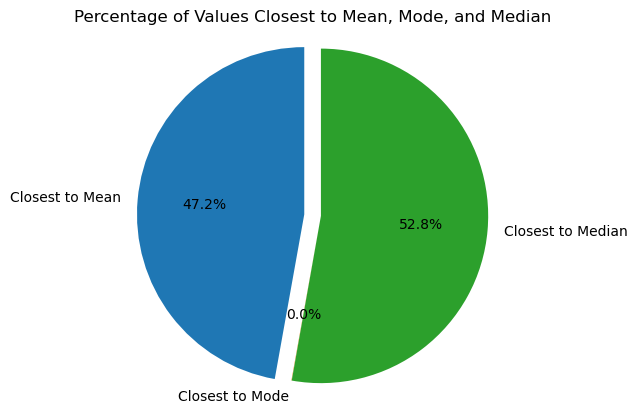

In [9]:
# calculate the percentage of values that are closest to mean, mode, and median
dataset['closest_to_mean'] = abs(dataset['amt'] - mean) <= abs(dataset['amt'] - mode)
dataset['closest_to_mode'] = dataset['amt'] == mode
dataset['closest_to_median'] = abs(dataset['amt'] - median) <= abs(dataset['amt'] - mode)

# calculate the percentage of values that are closest to mean, mode, and median with respect to all values in the column
percentage_closest_to_mean = round((dataset['closest_to_mean'].sum() / dataset['amt'].count()) * 100, 2)
percentage_closest_to_mode = round((dataset['closest_to_mode'].sum() / dataset['amt'].count()) * 100, 2)
percentage_closest_to_median = round((dataset['closest_to_median'].sum() / dataset['amt'].count()) * 100, 2)

# create a pie chart showing the percentage of values that are closest to mean, mode, and median with respect to all values in the column
labels = ['Closest to Mean', 'Closest to Mode', 'Closest to Median']
sizes = [percentage_closest_to_mean, percentage_closest_to_mode, percentage_closest_to_median]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
explode = (0.1, 0, 0)
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Percentage of Values Closest to Mean, Mode, and Median')
plt.show()

In [92]:
#imputing
impute = SimpleImputer(missing_values=np.nan, strategy='median')
impute.fit(dataset[['amt']])
dataset['amt'] = impute.transform(dataset[['amt']])

In [93]:
#Dropping Null column
dataset = dataset.dropna(subset=['unix_time'])

In [94]:
dataset.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [95]:
dataset.shape

(1296524, 23)

###  Handling with Catagorical values

In [96]:
object_cols = dataset.select_dtypes(include=['object']).columns
for col in object_cols:
    le = LabelEncoder()
    dataset[col] = le.fit_transform(dataset[col])

In [97]:
dataset.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,0,2703186189652095,514,8,4.97,162,18,0,568,...,36.0788,-81.1781,3495,370,779,56433,1.325376e+09,36.011293,-82.048315,0
1,1,1,630423337322,241,4,107.23,309,157,0,435,...,48.8878,-118.2105,149,428,607,159380,1.325376e+09,49.159047,-118.186462,0
2,2,2,38859492057661,390,0,220.11,115,381,1,602,...,42.1808,-112.2620,4154,307,302,818618,1.325376e+09,43.150704,-112.154481,0
3,3,3,3534093764340240,360,2,45.00,163,463,1,930,...,46.2306,-112.1138,1939,328,397,544518,1.325376e+09,47.034331,-112.561071,0
4,4,4,375534208663984,297,9,41.96,336,149,1,418,...,38.4207,-79.4629,99,116,734,831025,1.325376e+09,38.674999,-78.632459,0


### Correlation of all the features

In [98]:
corr = dataset.corr()
corr

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
Unnamed: 0,1.000000,0.999999,0.000389,-0.000968,0.000243,-0.000239,0.000515,0.000126,-0.000943,-0.001081,...,0.000600,-0.000658,-0.001688,-0.000010,0.003713,-0.000596,0.998971,0.000539,-0.000653,-0.004755
trans_date_trans_time,0.999999,1.000000,0.000388,-0.000969,0.000243,-0.000241,0.000514,0.000126,-0.000943,-0.001081,...,0.000600,-0.000658,-0.001689,-0.000009,0.003710,-0.000597,0.999007,0.000538,-0.000653,-0.004764
cc_num,0.000389,0.000388,1.000000,0.000060,0.001232,0.001725,-0.027177,0.006899,0.001128,0.046510,...,-0.059278,-0.048267,-0.008993,0.029146,0.002393,0.001409,0.000356,-0.058951,-0.048240,-0.000975
merchant,-0.000968,-0.000969,0.000060,1.000000,0.032304,-0.002636,-0.001572,-0.000434,-0.000920,0.000736,...,-0.002249,-0.000710,0.001938,0.001375,0.006801,-0.000466,-0.000995,-0.002248,-0.000687,-0.000529
category,0.000243,0.000243,0.001232,0.032304,1.000000,0.030870,-0.001925,-0.004325,-0.028249,0.002257,...,-0.008662,-0.000740,0.009392,0.003478,0.004359,-0.000345,0.000175,-0.008521,-0.000708,0.020203
amt,-0.000239,-0.000241,0.001725,-0.002636,0.030870,1.000000,-0.003587,-0.004689,0.001044,0.001345,...,-0.001929,-0.000147,0.005827,-0.000633,0.010665,-0.001272,-0.000280,-0.001875,-0.000110,0.219178
first,0.000515,0.000514,-0.027177,-0.001572,-0.001925,-0.003587,1.000000,-0.056981,0.015197,-0.045359,...,0.131865,-0.016476,-0.066601,-0.039693,0.004200,0.000883,0.000488,0.130960,-0.016489,-0.003220
last,0.000126,0.000126,0.006899,-0.000434,-0.004325,-0.004689,-0.056981,1.000000,0.043737,0.005639,...,-0.034928,-0.025545,-0.012027,-0.024588,-0.019168,0.000154,0.000099,-0.034562,-0.025545,-0.000090
gender,-0.000943,-0.000943,0.001128,-0.000920,-0.028249,0.001044,0.015197,0.043737,1.000000,0.042685,...,0.042922,0.050399,-0.028639,-0.079912,-0.012178,-0.000255,-0.000958,0.042630,0.050345,0.007620
street,-0.001081,-0.001081,0.046510,0.000736,0.002257,0.001345,-0.045359,0.005639,0.042685,1.000000,...,-0.012652,0.071336,-0.012541,-0.020225,-0.042522,-0.001430,-0.001104,-0.012518,0.071295,0.001441


<Axes: >

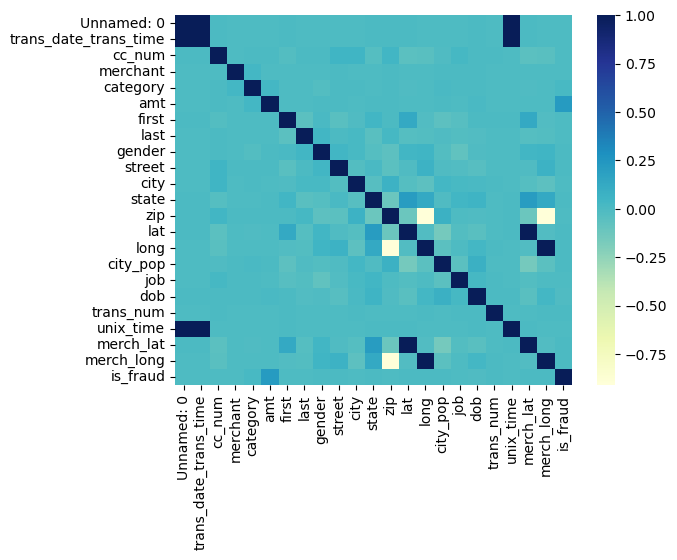

In [99]:
sns.heatmap(corr, cmap = 'YlGnBu')

### Dropping Unnecessary Columns

In [100]:
train_df = dataset.drop(["Unnamed: 0", "gender", "first", "last", "street", "city", "state", "zip", "dob","trans_num"], axis=1)

### Spliting the dataset

In [101]:
X = train_df.drop("is_fraud",axis=1).values
y = train_df["is_fraud"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state=2)

In [102]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (907566, 12)
y_train shape: (907566,)


In [103]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (388958, 12)
y_test shape: (388958,)


### Feature scaling

In [172]:
scaler= StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [105]:
dataset.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,0,2703186189652095,514,8,4.97,162,18,0,568,...,36.0788,-81.1781,3495,370,779,56433,1.325376e+09,36.011293,-82.048315,0
1,1,1,630423337322,241,4,107.23,309,157,0,435,...,48.8878,-118.2105,149,428,607,159380,1.325376e+09,49.159047,-118.186462,0
2,2,2,38859492057661,390,0,220.11,115,381,1,602,...,42.1808,-112.2620,4154,307,302,818618,1.325376e+09,43.150704,-112.154481,0
3,3,3,3534093764340240,360,2,45.00,163,463,1,930,...,46.2306,-112.1138,1939,328,397,544518,1.325376e+09,47.034331,-112.561071,0
4,4,4,375534208663984,297,9,41.96,336,149,1,418,...,38.4207,-79.4629,99,116,734,831025,1.325376e+09,38.674999,-78.632459,0


### Applying KNN on our dataset

In [24]:
knn = KNeighborsClassifier(n_neighbors=3)

In [25]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [26]:
y_pred = knn.predict(X_test)

In [27]:
knn_old_training = accuracy_score(y_train, knn.predict(X_train))
knn_old_test = accuracy_score(y_test, y_pred)
print(f'Training Accuracy: {knn_old_training}')
print(f'Testing Accuracy: {knn_old_test}')

Training Accuracy: 0.9971462130577832
Testing Accuracy: 0.9953696800168655


In [28]:
report = classification_report(y_test, y_pred)
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, pos_label=1)
knn_old_Precision = precision[1]
knn_old_Recall = recall[1]
print('Precision:', knn_old_Precision)
print('Recall:', knn_old_Recall)

Precision: 0.6504010695187166
Recall: 0.43225233229675697


In [29]:
knn_cm = confusion_matrix(y_test, y_pred)
print(knn_cm)

[[386184    523]
 [  1278    973]]


<Axes: >

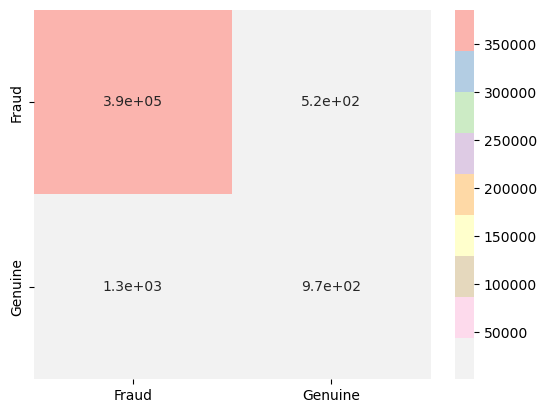

In [30]:
sns.heatmap(knn_cm, annot=True, cmap='Pastel1_r', xticklabels=['Fraud' ,'Genuine'],yticklabels=['Fraud' ,'Genuine'])

### Applying LogisticRegression on our dataset

In [106]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)

In [107]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [108]:
X_train_prediction = model.predict(X_train)
logi_old_training_data_accuracy = accuracy_score(X_train_prediction, y_train)
X_test_prediction = model.predict(X_test)
logi_old_test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [109]:
print('Accuracy on Training data : ', logi_old_training_data_accuracy)
print('Accuracy score on Test Data : ', logi_old_test_data_accuracy)

Accuracy on Training data :  0.9936809003422341
Accuracy score on Test Data :  0.9936882645427013


In [110]:
report = classification_report(y_test, X_test_prediction)
precision, recall, f1, support = precision_recall_fscore_support(y_test, X_test_prediction, pos_label=1)
logi_old_Precision = precision[1]
logi_old_Recall = recall[1]
print('Precision:', logi_old_Precision)
print('Recall:', logi_old_Recall)

Precision: 0.0
Recall: 0.0


In [111]:
logi_cm_old = confusion_matrix(y_test, X_test_prediction)
print(logi_cm_old)

[[386503    204]
 [  2251      0]]


<Axes: >

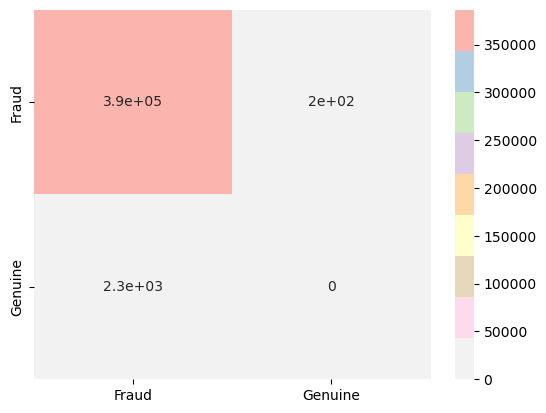

In [112]:
sns.heatmap(logi_cm_old, annot=True, cmap='Pastel1_r', xticklabels=['Fraud' ,'Genuine'],yticklabels=['Fraud' ,'Genuine'])

### Applying Naive Bayes on our dataset

In [113]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [114]:
gnb_old_training = gnb.score(X_train, y_train)
gnb_old_test = gnb.score(X_test, y_test)
print("Training accuracy of the model is {:.2f}".format(gnb_old_training))
print("Testing accuracy of the model is {:.2f}".format(gnb_old_test))

Training accuracy of the model is 0.99
Testing accuracy of the model is 0.99


In [115]:
y_pred = gnb.predict(X_test)
report = classification_report(y_test, y_pred)
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, pos_label=1)
gnb_old_Precision = precision[1]
gnb_old_Recall = recall[1]
print('Precision:', gnb_old_Precision)
print('Recall:', gnb_old_Recall)

Precision: 0.2156784719458814
Recall: 0.48156374944469127


In [116]:
predictions = gnb.predict(X_test)
gnb_old_new=confusion_matrix(predictions, y_test)
print(gnb_old_new)

[[382765   1167]
 [  3942   1084]]


<Axes: >

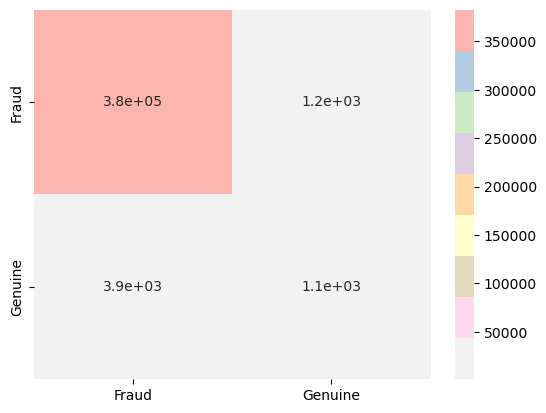

In [117]:
sns.heatmap(gnb_old_new, annot=True, cmap='Pastel1_r', xticklabels=['Fraud' ,'Genuine'],yticklabels=['Fraud' ,'Genuine'])

### Over sampling the dataset

In [118]:
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

In [119]:
pd.Series(y_resampled).value_counts()

0    1289020
1    1289020
dtype: int64

### Under sampaling the dataset

In [120]:
legit = dataset[dataset.is_fraud==0]
fraud = dataset[dataset.is_fraud==1]
print(legit.shape)
print(fraud.shape)

(1289020, 23)
(7504, 23)


In [121]:
legit.amt.describe()

count    1.289020e+06
mean     6.765301e+01
std      1.539861e+02
min      1.000000e+00
25%      9.620000e+00
50%      4.736000e+01
75%      8.250000e+01
max      2.894890e+04
Name: amt, dtype: float64

In [122]:
fraud.amt.describe()

count    7504.000000
mean      530.777898
std       390.640603
min         1.060000
25%       243.027500
50%       392.385000
75%       900.770000
max      1376.040000
Name: amt, dtype: float64

In [123]:
dataset.groupby('is_fraud').mean()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long
is_fraud,,,,,,,,,,,,,,,,,,,,,
0,648479.428062,637795.023923,4.172888e+17,342.866385,6.221734,67.653015,180.286146,250.523472,0.452265,488.001988,...,48805.219177,38.536837,-90.228093,88773.711401,251.174582,534.478887,648237.981637,1.349249e+09,38.536611,-90.228233
1,625016.652852,614702.148721,4.004638e+17,341.464286,7.263993,530.777898,176.146588,250.361007,0.502265,493.323561,...,48036.671509,38.663242,-89.916955,97302.103145,250.966551,491.609808,652301.430704,1.348391e+09,38.653567,-89.916643


In [124]:
legitSample = legit.sample(n=7506)

In [125]:
newDataset = pd.concat([legitSample, fraud], axis = 0)

In [126]:
newDataset.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
934134,934134,917434,3595192916105588,428,4,63.24,111,365,1,332,...,35.0583,-79.0080,238602,413,862,926769,1.357466e+09,35.214844,-78.146773,0
15705,15705,15518,4841313716651064,673,9,36.14,259,153,1,215,...,43.7185,-72.4439,140,130,803,401249,1.326167e+09,44.043359,-72.816116,0
826561,826561,812812,3585052663373890,596,6,155.15,159,46,1,302,...,42.8546,-75.6605,176,406,341,1254016,1.355082e+09,42.167814,-74.767733,0
766682,766682,754583,377026671291680,338,10,60.96,149,99,0,185,...,37.3272,-91.0243,241,254,545,1002724,1.353764e+09,38.200353,-91.139952,0
561740,561740,552731,4045036286570100739,689,10,53.37,36,389,0,954,...,39.9458,-75.9703,3066,357,14,179679,1.346023e+09,40.654418,-75.048956,0


In [127]:
newDataset.groupby('is_fraud').mean()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long
is_fraud,,,,,,,,,,,,,,,,,,,,,
0,651993.431788,641247.157474,4.108580e+17,341.773381,6.301092,68.844357,180.361178,250.819611,0.459366,486.363043,...,48902.653344,38.404593,-90.212459,90970.525846,253.185985,538.646150,648553.318545,1.349373e+09,38.398764,-90.205375
1,625016.652852,614702.148721,4.004638e+17,341.464286,7.263993,530.777898,176.146588,250.361007,0.502265,493.323561,...,48036.671509,38.663242,-89.916955,97302.103145,250.966551,491.609808,652301.430704,1.348391e+09,38.653567,-89.916643


In [128]:
corr = newDataset.corr()
corr

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
Unnamed: 0,1.000000,0.999999,0.012597,0.005332,0.006853,-0.006223,0.025857,-0.016164,0.015129,0.002980,...,-0.009531,0.002563,-0.002887,0.011474,-0.014903,0.010645,0.999034,-0.010340,0.002323,-0.034782
trans_date_trans_time,0.999999,1.000000,0.012601,0.005339,0.006857,-0.006257,0.025861,-0.016167,0.015166,0.002971,...,-0.009529,0.002595,-0.002900,0.011490,-0.014904,0.010645,0.999068,-0.010338,0.002354,-0.034842
cc_num,0.012597,0.012601,1.000000,0.013114,0.000549,0.008606,0.007169,0.010428,0.022352,0.008418,...,-0.052183,-0.048626,-0.010262,0.032125,-0.014799,-0.001369,0.012922,-0.051899,-0.048552,-0.004035
merchant,0.005332,0.005339,0.013114,1.000000,0.027770,-0.001251,0.002033,-0.001239,0.012781,-0.010058,...,0.002314,-0.004404,0.007995,0.006779,0.014845,0.011282,0.005257,0.002344,-0.004372,-0.000785
category,0.006853,0.006857,0.000549,0.027770,1.000000,0.411541,-0.023274,0.006148,-0.001071,-0.004231,...,-0.003928,0.017939,-0.004471,-0.003566,-0.001679,-0.012868,0.006808,-0.002777,0.018716,0.124207
amt,-0.006223,-0.006257,0.008606,-0.001251,0.411541,1.000000,-0.008787,0.001129,0.065925,0.005243,...,0.018525,0.010872,0.015345,-0.012860,-0.067113,0.000826,-0.007617,0.017808,0.010925,0.584884
first,0.025857,0.025861,0.007169,0.002033,-0.023274,-0.008787,1.000000,-0.065253,0.003906,-0.035591,...,0.111369,-0.039107,-0.032312,-0.035792,0.034065,0.005908,0.025417,0.110393,-0.039489,-0.021679
last,-0.016164,-0.016167,0.010428,-0.001239,0.006148,0.001129,-0.065253,1.000000,0.034188,0.016601,...,-0.030637,0.005765,-0.030192,0.002190,-0.014335,0.007274,-0.016360,-0.030408,0.005808,-0.001670
gender,0.015129,0.015166,0.022352,0.012781,-0.001071,0.065925,0.003906,0.034188,1.000000,0.038916,...,0.051000,0.035403,-0.020478,-0.086400,-0.004165,-0.004794,0.015629,0.050248,0.035620,0.042931
street,0.002980,0.002971,0.008418,-0.010058,-0.004231,0.005243,-0.035591,0.016601,0.038916,1.000000,...,0.009596,0.050762,-0.007338,-0.029478,-0.048954,-0.008116,0.002574,0.009511,0.051100,0.012362


<Axes: >

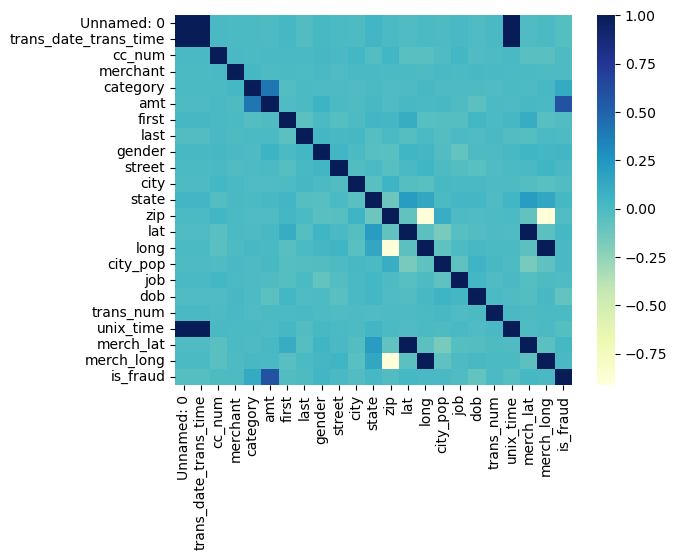

In [129]:
sns.heatmap(corr, cmap = 'YlGnBu')

In [130]:
train_df2 = newDataset.drop(["Unnamed: 0", "gender", "first", "last", "street", "city", "state", "zip","dob","trans_num"], axis=1)

In [131]:
nX = train_df2.drop("is_fraud",axis=1)
ny = train_df2["is_fraud"]
X_trainN, X_testN, y_trainN, y_testN = train_test_split(nX, ny, test_size=0.3,stratify=ny,random_state=2)

In [132]:
scaler.fit(X_trainN)
print(scaler.mean_)
X_trainN = scaler.transform(X_trainN)
X_testN = scaler.transform(X_testN)

[ 6.24886616e+05  4.00602822e+17  3.41678595e+02  6.79518416e+00
  3.00551452e+02  3.85451145e+01 -9.00766628e+01  9.24277754e+04
  2.51319787e+02  1.34876777e+09  3.85372427e+01 -9.00743652e+01]


### Applying KNN on our under sampled dataset

In [187]:
knn = KNeighborsClassifier(n_neighbors=953)
knn.fit(X_trainN, y_trainN)
y_pred = knn.predict(X_testN)

In [188]:
knn_new_training = accuracy_score(y_trainN, knn.predict(X_trainN))
knn_new_test = accuracy_score(y_testN, y_pred)
print(f'Training Accuracy: {knn_new_training}')
print(f'Testing Accuracy: {knn_new_test}')

Training Accuracy: 0.7367469306176835
Testing Accuracy: 0.7363979569176105


In [189]:
report = classification_report(y_testN, y_pred)
precision, recall, f1, support = precision_recall_fscore_support(y_testN, y_pred, pos_label=1)
knn_new_Precision = precision[1]
knn_new_Recall = recall[1]
print('Precision:', knn_new_Precision)
print('Recall:', knn_new_Recall)

Precision: 0.975
Recall: 0.4851177254553532


In [190]:
knn_cm_new = confusion_matrix(y_testN, y_pred)
print(knn_cm_new)

[[2224   28]
 [1159 1092]]


<Axes: >

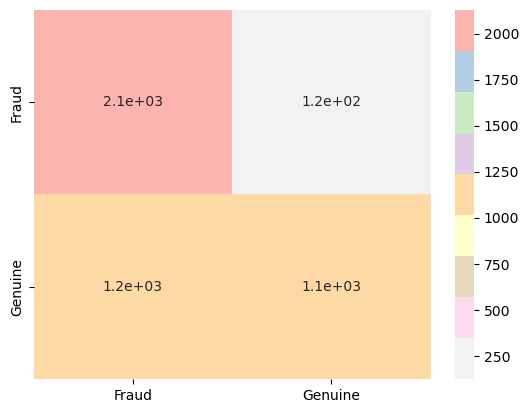

In [186]:
sns.heatmap(knn_cm_new, annot=True, cmap='Pastel1_r', xticklabels=['Fraud' ,'Genuine'],yticklabels=['Fraud' ,'Genuine'])

### Applying LogisticRegression on our under sampled dataset

In [138]:
model = LogisticRegression(max_iter=1000)

In [139]:
model.fit(X_trainN,y_trainN)

LogisticRegression(max_iter=1000)

In [140]:
X_train_prediction = model.predict(X_trainN)
logi_new_training_data_accuracy = accuracy_score(X_train_prediction, y_trainN)
X_test_prediction = model.predict(X_testN)
logi_new_test_data_accuracy = accuracy_score(X_test_prediction, y_testN)

In [141]:
print('Accuracy on Training data : ', logi_new_training_data_accuracy)
print('Accuracy score on Test Data : ', logi_new_test_data_accuracy)

Accuracy on Training data :  0.8549538402969449
Accuracy score on Test Data :  0.8565400843881856


In [142]:
report = classification_report(y_testN, X_test_prediction)
precision, recall, f1, support = precision_recall_fscore_support(y_testN, X_test_prediction, pos_label=1)
logi_new_Precision = precision[1]
logi_new_Recall = recall[1]
print('Precision:', logi_new_Precision)
print('Recall:', logi_new_Recall)

Precision: 0.9431253451131971
Recall: 0.7587738782763216


In [143]:
logi_cm_new = confusion_matrix(y_testN, X_test_prediction)
print(logi_cm_new)

[[2149  103]
 [ 543 1708]]


<Axes: >

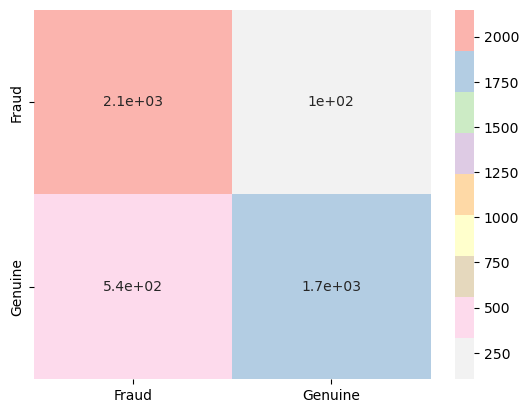

In [144]:
sns.heatmap(logi_cm_new, annot=True, cmap='Pastel1_r', xticklabels=['Fraud' ,'Genuine'],yticklabels=['Fraud' ,'Genuine'])

### Applying Naive Bayes on our under sampled dataset

In [145]:
gnb = GaussianNB()
gnb.fit(X_trainN, y_trainN)

GaussianNB()

In [146]:
gnb_new_training = gnb.score(X_trainN, y_trainN)
gnb_new_test = gnb.score(X_testN, y_testN)
print("Training accuracy of the model is {:.2f}".format(gnb_new_training))
print("Testing accuracy of the model is {:.2f}".format(gnb_new_test))

Training accuracy of the model is 0.76
Testing accuracy of the model is 0.76


In [147]:
y_pred = gnb.predict(X_testN)
report = classification_report(y_testN, y_pred)
precision, recall, f1, support = precision_recall_fscore_support(y_testN, y_pred, pos_label=1)
gnb_new_Precision = precision[1]
gnb_new_Recall = recall[1]
print('Precision:', gnb_new_Precision)
print('Recall:', gnb_new_Precision)

Precision: 0.9513725490196079
Recall: 0.9513725490196079


In [148]:
predictions = gnb.predict(X_testN)
gnb_cm_new=confusion_matrix(predictions, y_testN)
print(gnb_cm_new)

[[2190 1038]
 [  62 1213]]


<Axes: >

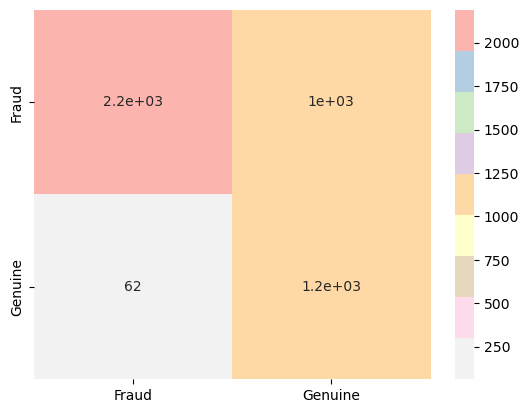

In [149]:
sns.heatmap(gnb_cm_new, annot=True, cmap='Pastel1_r', xticklabels=['Fraud' ,'Genuine'],yticklabels=['Fraud' ,'Genuine'])

### Accuracy Comparison of Three Models

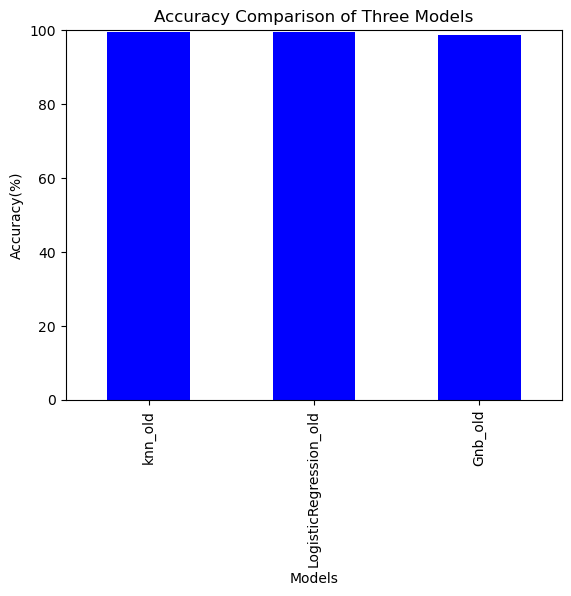

In [150]:
accuracy = {'Model': ['knn_old', 'LogisticRegression_old', 'Gnb_old'],
        'Accuracy': [knn_old_test*100, logi_old_test_data_accuracy*100, gnb_old_test*100]}
df = pd.DataFrame(accuracy)
ax = df.plot(kind='bar', x='Model', y='Accuracy', color='blue', legend=False)
ax.set_ylim([0, 100])
ax.set_title('Accuracy Comparison of Three Models')
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy(%)')
plt.show()

### Accuracy Comparison of Three Models using under sampled data

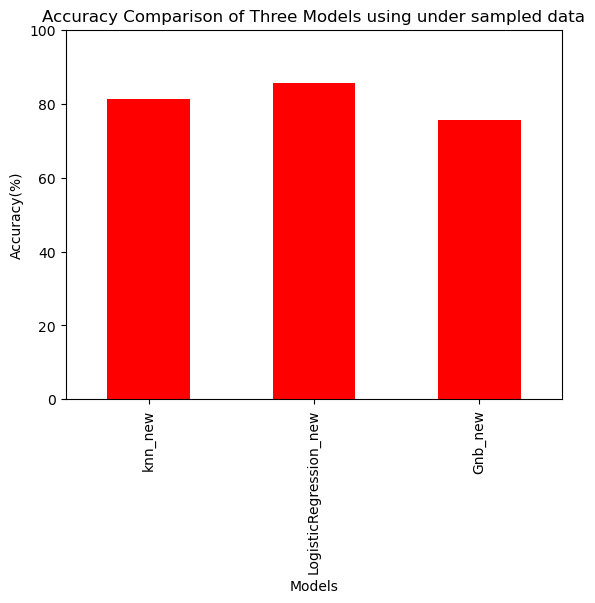

In [151]:
accuracy = {'Model': ['knn_new', 'LogisticRegression_new', 'Gnb_new'],
        'Accuracy': [knn_new_test*100, logi_new_test_data_accuracy*100, gnb_new_test*100]}
df = pd.DataFrame(accuracy)
ax = df.plot(kind='bar', x='Model', y='Accuracy', color='red', legend=False)
ax.set_ylim([0, 100])
ax.set_title('Accuracy Comparison of Three Models using under sampled data')
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy(%)')
plt.show()

### Accuracy Comparison of  Unbalaced and Balanced Dataset

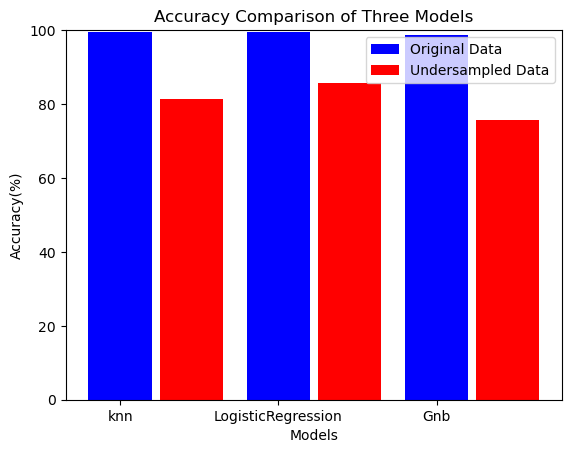

In [152]:
accuracy1 = {'Model': ['knn', 'LogisticRegression', 'Gnb'],
        'Accuracy': [knn_old_test*100, logi_old_test_data_accuracy*100, gnb_old_test*100]}
df1 = pd.DataFrame(accuracy1)
accuracy2 = {'Model': ['knn_new', 'LogisticRegression_new', 'Gnb_new'],
        'Accuracy': [knn_new_test*100, logi_new_test_data_accuracy*100, gnb_new_test*100]}
df2 = pd.DataFrame(accuracy2)
bar_width = 0.4
space = 0.5
x2 = np.arange(len(df2)) + (bar_width + space) / 2
plt.bar(np.arange(len(df1)), df1['Accuracy'], width=bar_width, color='blue', label='Original Data')
plt.bar(x2, df2['Accuracy'], width=bar_width, color='red', label='Undersampled Data')
plt.xticks(np.arange(len(df1)), df1['Model'])
plt.ylim([0, 100])
plt.title('Accuracy Comparison of Three Models')
plt.xlabel('Models')
plt.ylabel('Accuracy(%)')
plt.legend()
plt.show()

### Precision Comparison of Three Models

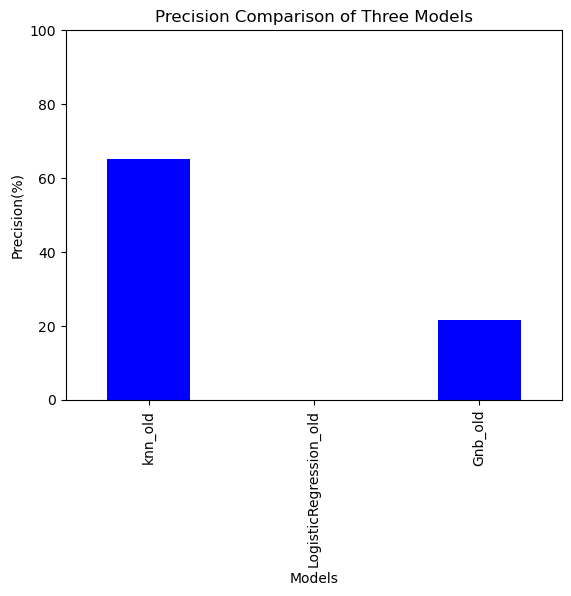

In [153]:
accuracy = {'Model': ['knn_old', 'LogisticRegression_old', 'Gnb_old'],
        'Accuracy': [knn_old_Precision*100, logi_old_Precision*100, gnb_old_Precision*100]}
df = pd.DataFrame(accuracy)
ax = df.plot(kind='bar', x='Model', y='Accuracy', color='blue', legend=False)
ax.set_ylim([0, 100])
ax.set_title('Precision Comparison of Three Models')
ax.set_xlabel('Models')
ax.set_ylabel('Precision(%)')
plt.show()

### Precision Comparison of Three Models using under sampled data

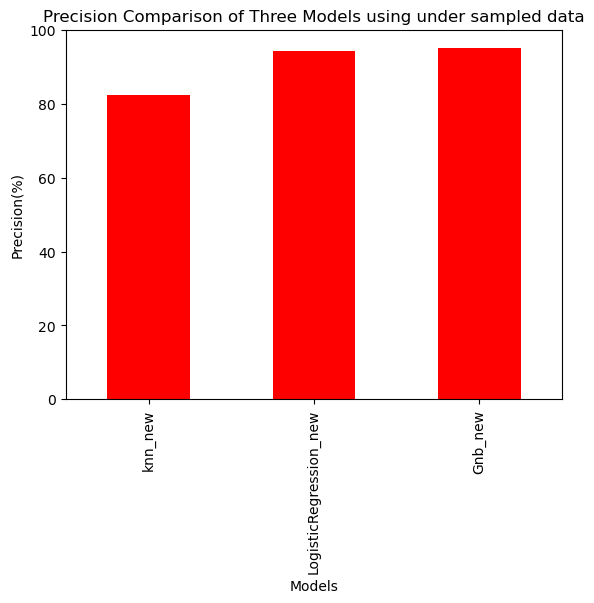

In [154]:
accuracy = {'Model': ['knn_new', 'LogisticRegression_new', 'Gnb_new'],
        'Accuracy': [knn_new_Precision*100, logi_new_Precision*100, gnb_new_Precision*100]}
df = pd.DataFrame(accuracy)
ax = df.plot(kind='bar', x='Model', y='Accuracy', color='red', legend=False)
ax.set_ylim([0, 100])
ax.set_title('Precision Comparison of Three Models using under sampled data')
ax.set_xlabel('Models')
ax.set_ylabel('Precision(%)')
plt.show()

### Precision Comparison of  Unbalaced and Balanced Dataset

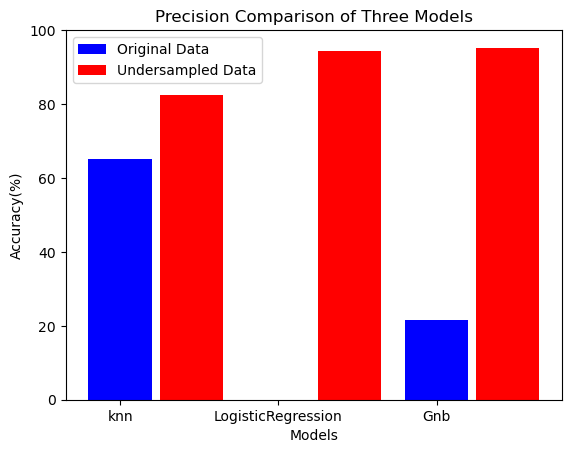

In [155]:
accuracy1 = {'Model': ['knn', 'LogisticRegression', 'Gnb'],
        'Accuracy': [knn_old_Precision*100, logi_old_Precision*100, gnb_old_Precision*100]}
df1 = pd.DataFrame(accuracy1)
accuracy2 = {'Model': ['knn_new', 'LogisticRegression_new', 'Gnb_new'],
        'Accuracy': [knn_new_Precision*100, logi_new_Precision*100, gnb_new_Precision*100]}
df2 = pd.DataFrame(accuracy2)
bar_width = 0.4
space = 0.5
x2 = np.arange(len(df2)) + (bar_width + space) / 2
plt.bar(np.arange(len(df1)), df1['Accuracy'], width=bar_width, color='blue', label='Original Data')
plt.bar(x2, df2['Accuracy'], width=bar_width, color='red', label='Undersampled Data')
plt.xticks(np.arange(len(df1)), df1['Model'])
plt.ylim([0, 100])
plt.title('Precision Comparison of Three Models')
plt.xlabel('Models')
plt.ylabel('Accuracy(%)')
plt.legend()
plt.show()

### Recall Comparison of Three Models

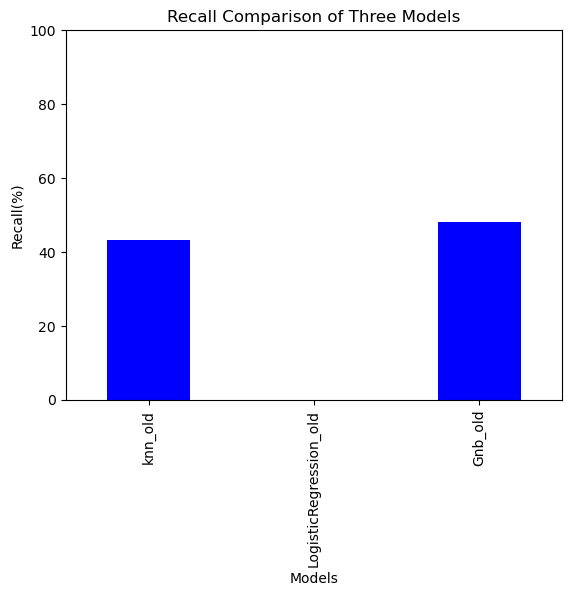

In [156]:
accuracy = {'Model': ['knn_old', 'LogisticRegression_old', 'Gnb_old'],
        'Accuracy': [knn_old_Recall*100, logi_old_Recall*100, gnb_old_Recall*100]}
df = pd.DataFrame(accuracy)
ax = df.plot(kind='bar', x='Model', y='Accuracy', color='blue', legend=False)
ax.set_ylim([0, 100])
ax.set_title('Recall Comparison of Three Models')
ax.set_xlabel('Models')
ax.set_ylabel('Recall(%)')
plt.show()

### Recall Comparison of Three Models using under sampled data

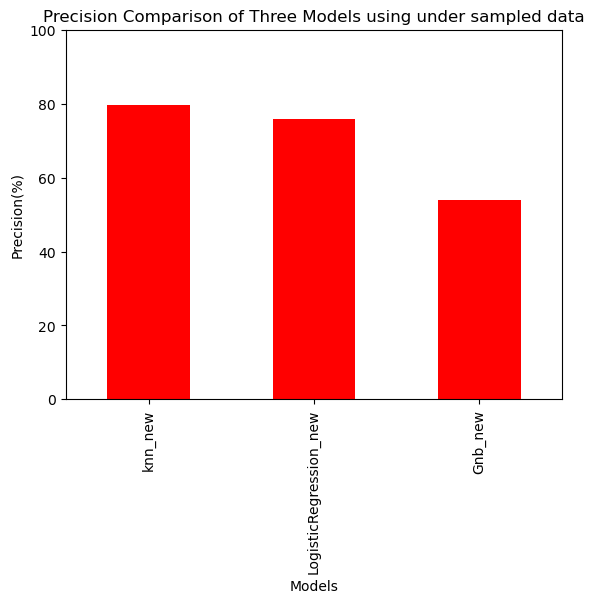

In [157]:
accuracy = {'Model': ['knn_new', 'LogisticRegression_new', 'Gnb_new'],
        'Accuracy': [knn_new_Recall*100, logi_new_Recall*100, gnb_new_Recall*100]}
df = pd.DataFrame(accuracy)
ax = df.plot(kind='bar', x='Model', y='Accuracy', color='red', legend=False)
ax.set_ylim([0, 100])
ax.set_title('Precision Comparison of Three Models using under sampled data')
ax.set_xlabel('Models')
ax.set_ylabel('Precision(%)')
plt.show()

### Recall Comparison of  Unbalaced and Balanced Dataset

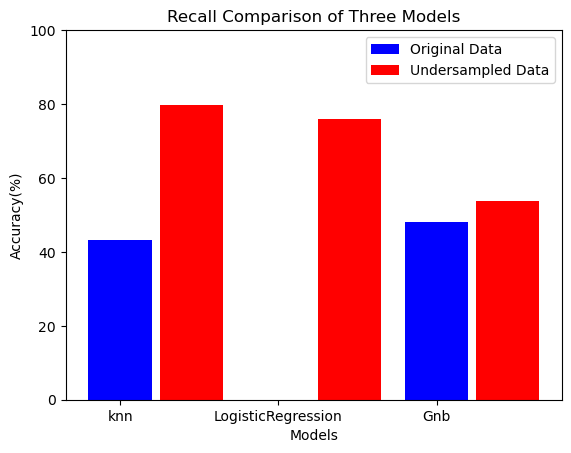

In [158]:
accuracy1 = {'Model': ['knn', 'LogisticRegression', 'Gnb'],
        'Accuracy': [knn_old_Recall*100, logi_old_Recall*100, gnb_old_Recall*100]}
df1 = pd.DataFrame(accuracy1)
accuracy2 = {'Model': ['knn_new', 'LogisticRegression_new', 'Gnb_new'],
        'Accuracy': [knn_new_Recall*100, logi_new_Recall*100, gnb_new_Recall*100]}
df2 = pd.DataFrame(accuracy2)
bar_width = 0.4
space = 0.5
x2 = np.arange(len(df2)) + (bar_width + space) / 2
plt.bar(np.arange(len(df1)), df1['Accuracy'], width=bar_width, color='blue', label='Original Data')
plt.bar(x2, df2['Accuracy'], width=bar_width, color='red', label='Undersampled Data')
plt.xticks(np.arange(len(df1)), df1['Model'])
plt.ylim([0, 100])
plt.title('Recall Comparison of Three Models')
plt.xlabel('Models')
plt.ylabel('Accuracy(%)')
plt.legend()
plt.show()

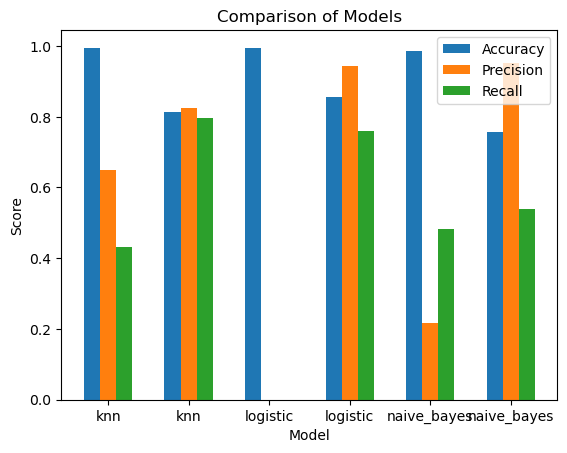

In [169]:
import matplotlib.pyplot as plt


models = ['knn', 'knn', 'logistic', 'logistic', 'naive_bayes', 'naive_bayes']
accuracy = [knn_old_test, knn_new_test, logi_old_test_data_accuracy, logi_new_test_data_accuracy, gnb_old_test, gnb_new_test]
precision = [knn_old_Precision,knn_new_Precision, logi_old_Precision, logi_new_Precision, gnb_old_Precision, gnb_new_Precision]
recall = [knn_old_Recall, knn_new_Recall, logi_old_Recall,logi_new_Recall, gnb_old_Recall, gnb_new_Recall]


fig, ax = plt.subplots()
ax.bar([x-0.2 for x in range(len(models))], accuracy, width=0.2, label='Accuracy')
ax.bar([x for x in range(len(models))], precision, width=0.2, label='Precision')
ax.bar([x+0.2 for x in range(len(models))], recall, width=0.2, label='Recall')

ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_title('Comparison of Models')
ax.legend()

ax.set_xticks(range(len(models)))
ax.set_xticklabels(models)

plt.show()
